# Emotion Detection - Model Training



# Import Libraries

In [ ]:
# import libraries
from roboflow import Roboflow
from ultralytics import YOLO

# Data Loading

In [ ]:
# load dataset from roboflow
rf = Roboflow(api_key="4nKk8SUtILLwgumC19aK")
project = rf.workspace("spacex-bmpib").project("emotion-gyup3")
version = project.version(8)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 112.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.13.0.90
    Uninstalling opencv-python-headless-4.13.0.90:
      Successfully uninstalled opencv-python-headless-4.13.0.90
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to emotion-8 in yolov8:: 100%|██████████| 3682/3682 [00:00<00:00, 7874.74it/s]


- Dataset berhasil diambil dari Roboflow memakai API.
- Format yang didownload adalah YOLOv8 dengan struktur folder dan file label sudah otomatis siap dipakai untuk training.

# Load Model YOLO26n And Train

In [ ]:
# Load a pretrained YOLO26n model
model = YOLO("yolo26n.pt")

# Train the model on the COCO8 dataset for 100 epochs
train_results = model.train(
    data="emotion-8/data.yaml",  # Path to dataset configuration file
    epochs=100,  # Number of training epochs
    imgsz=640,  # Image size for training
    device=0,  # Device to run on (e.g., 'cpu', 0, [0,1,2,3])
    patience = 10
)

Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=emotion-8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=Tr

- Hasil evaluasi model terbaik (best.pt) menunjukkan:
    - Precision (P) = 0.896
    - Recall (R) = 0.868
    - mAP50 = 0.933
    - mAP50-95 = 0.669

- Model YOLO26n yang dilatih mampu mendeteksi dan mengklasifikasikan emosi dengan performa tinggi, terutama pada ekspresi yang memiliki ciri visual kuat. 
- Tantangan model terdapat emosi dengan perbedaan ekspresi halus seperti relax dan sad. 


# Model Performance

In [ ]:
# Evaluate the model's performance on the validation set
metrics = model.val()

Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO26n summary (fused): 122 layers, 2,376,201 parameters, 0 gradients, 5.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1354.0±307.9 MB/s, size: 33.9 KB)
val: Scanning /content/emotion-8/valid/labels.cache... 225 images, 15 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 225/225 85.8Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 15/15 3.3it/s 4.5s
                   all        225        258      0.907      0.861      0.933      0.668
                 angry         12         12      0.934       0.75      0.927       0.71
                 happy         31         31      0.883          1      0.986      0.748
                 relax         60        108      0.771      0.622      0.776       0.32
                  rock         20         20          1      0.908      0.993      0.689
              romantic         24         24

# Results


image 1/1 /content/emotion-8/test/images/0b136497e50a7ccb63deae5dc188bc3075fe6f1b2fef998960d84e72_jpg.rf.14d5eabe68c680a403c5813b4c7ae4fb.jpg: 640x640 1 happy, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


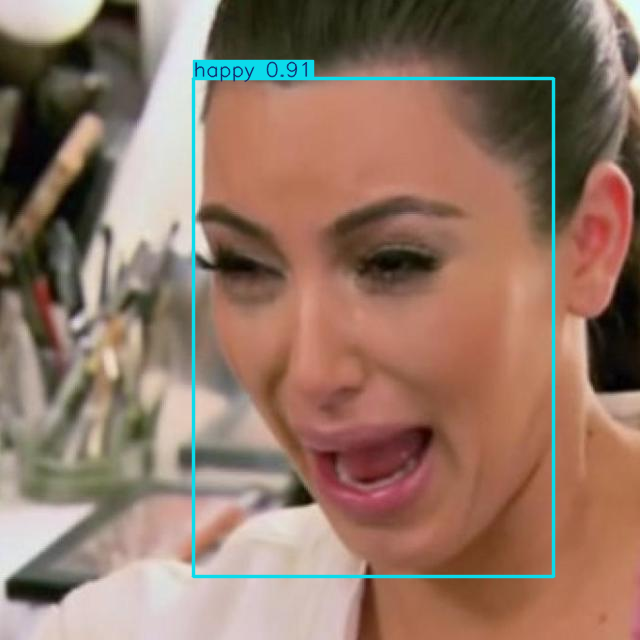

Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.5.1+cu121 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (5.1 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<2.0.0', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 166ms
Prepared 6 packages in 6.10s
Installed 6 packages in 446ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.20.1
 + onnxruntime-gpu==1.23.2
 + onnxslim==0.1.83

requirements: AutoUpdate success ✅ 7.3s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.20.1 opset 19...


Exporting aten::index operator of advanced indexing in opset 19 is achieved by combination of multiple ONNX operators, including Reshape, Transpose, Concat, and Gather. If indices include negative values, the exported graph will produce incorrect results.


ONNX: slimming with onnxslim 0.1.83...
ONNX: export success ✅ 9.3s, saved as '/content/runs/detect/train/weights/best.onnx' (9.4 MB)

Export complete (9.7s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640 data=emotion-8/data.yaml  
Visualize:       https://netron.app


In [ ]:
# Perform object detection on an image
results = model("/content/emotion-8/test/images/0b136497e50a7ccb63deae5dc188bc3075fe6f1b2fef998960d84e72_jpg.rf.14d5eabe68c680a403c5813b4c7ae4fb.jpg")  # Predict on an image
results[0].show()  # Display results

# Export the model to ONNX format for deployment
path = model.export(format="onnx")  # Returns the path to the exported model

# Saving as Zip

In [ ]:
!zip -r /content/runs.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/args.yaml (deflated 52%)
  adding: content/runs/detect/train/BoxF1_curve.png (deflated 6%)
  adding: content/runs/detect/train/val_batch1_pred.jpg (deflated 12%)
  adding: content/runs/detect/train/BoxR_curve.png (deflated 7%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 4%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 9%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/best.pt (deflated 11%)
  adding: content/runs/detect/train/weights/last.pt (deflated 11%)
  adding: content/runs/detect/train/weights/best.onnx (deflated 13%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 6%)
  adding: content/runs/detect/train/val_batch1_labels.jpg (deflated 12%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (d